# **Used Car Price Prediction**

1) Problem Statement
- This Dataset comprises used cars sold on cardekho.com in India as well as as important features of three cars.
- If user can predict the price of the car based on input features.
- Prediction result can be used to give new seller the price suggestion based on market condition.

2) Data Collection
- The dataset is collected from scrapping cardekho.com website.
- The data consists of 13 column and 15411 rows.

---

In [1]:
## importing important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\vikas\OneDrive\Desktop\Machine Learning\8 Random Forest\Random Forest Regression\cardekho_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.shape

(15411, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15411.0,6.036338,3.013291,0.0,4.0,6.00,8.0,29.00
km_driven,15411.0,55616.480631,51618.548422,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15411.0,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,1486.057751,521.106696,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15411.0,100.588254,42.972979,38.4,74.0,88.50,117.3,626.00
seats,15411.0,5.325482,0.807628,0.0,5.0,5.00,5.0,9.00
selling_price,15411.0,774971.116410,894128.363263,40000.0,385000.0,556000.00,825000.0,39500000.00


**Check Datatypes in the Datasets**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


**Exploring Data**

In [10]:
df['seller_type'].dtype == 'O'

True

In [11]:
# Define numerical & Categorical Columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


# **Feature Information**
 * **Car name:** The full name of the car, including the brand and specific model name.
 * **Brand:** The brand name of the car.
 * **Model:** The exact model name of the car.
 * **Seller type:** The type of seller selling the car.
 * **Fuel type:** The fuel used in the car.
 * **Transmission type:** The transmission type used in the car.
 * **Vehicle age:** The age of the car in years.
 * **Mileage:** The mileage of the car in kilometers per liter.
 * **Engine:** The engine capacity of the car in cubic centimeters.
 * **Max power:** The maximum power the car produces in BHP.
 * **Seats:** The total number of seats in the car.
 * **Selling price:** The selling price of the car as listed on the website.

In [12]:
# Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-----------------------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
-----------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG              

# **Univariate Analysis**
* The term univariate analysis refers to the analysis  of one variable prefix "uni" means "one". 
* The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### **Numerical Features**

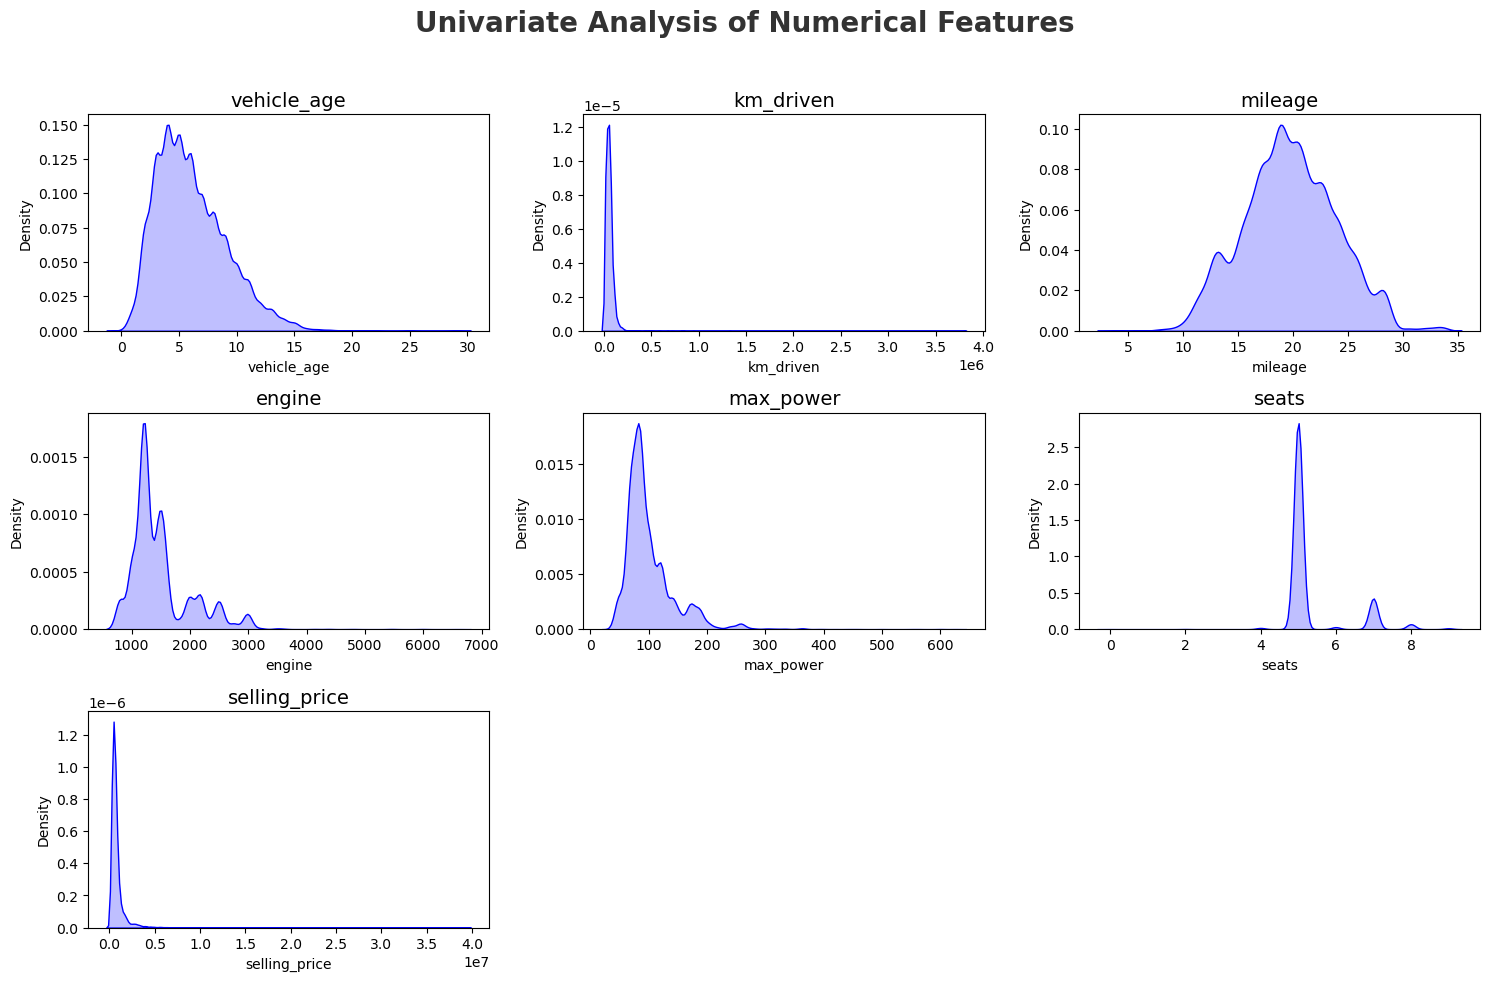

In [13]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numerical_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.title(numerical_features[i], fontsize=14)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.subplots_adjust(top=0.95)  # Adjust to fit the title
plt.show()


<Axes: ylabel='max_power'>

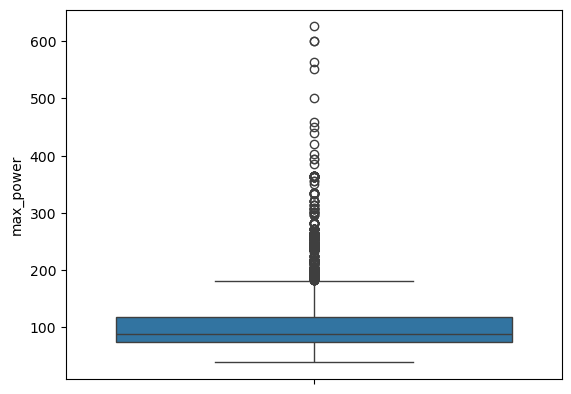

In [14]:
sns.boxplot(df['max_power'])

<Axes: ylabel='km_driven'>

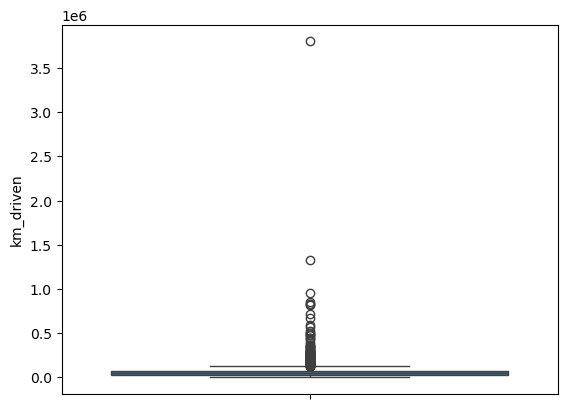

In [15]:
sns.boxplot(df['km_driven'])

<Axes: ylabel='selling_price'>

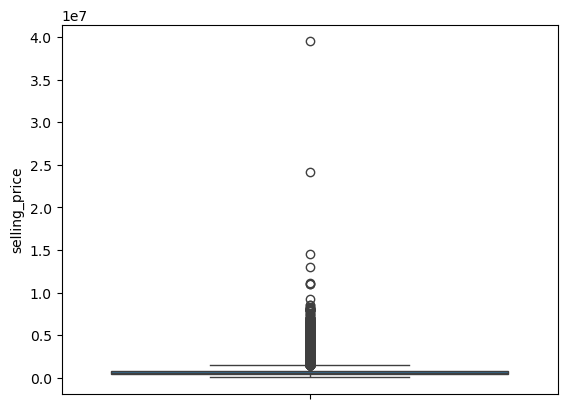

In [16]:
sns.boxplot(df['selling_price'])

**Report**
* km_driven, max_power, selling_price and engine are right skewed and positively skewed.
* Outliers in km_driven, enginer, seller_price and max_power

**Categorical Features**

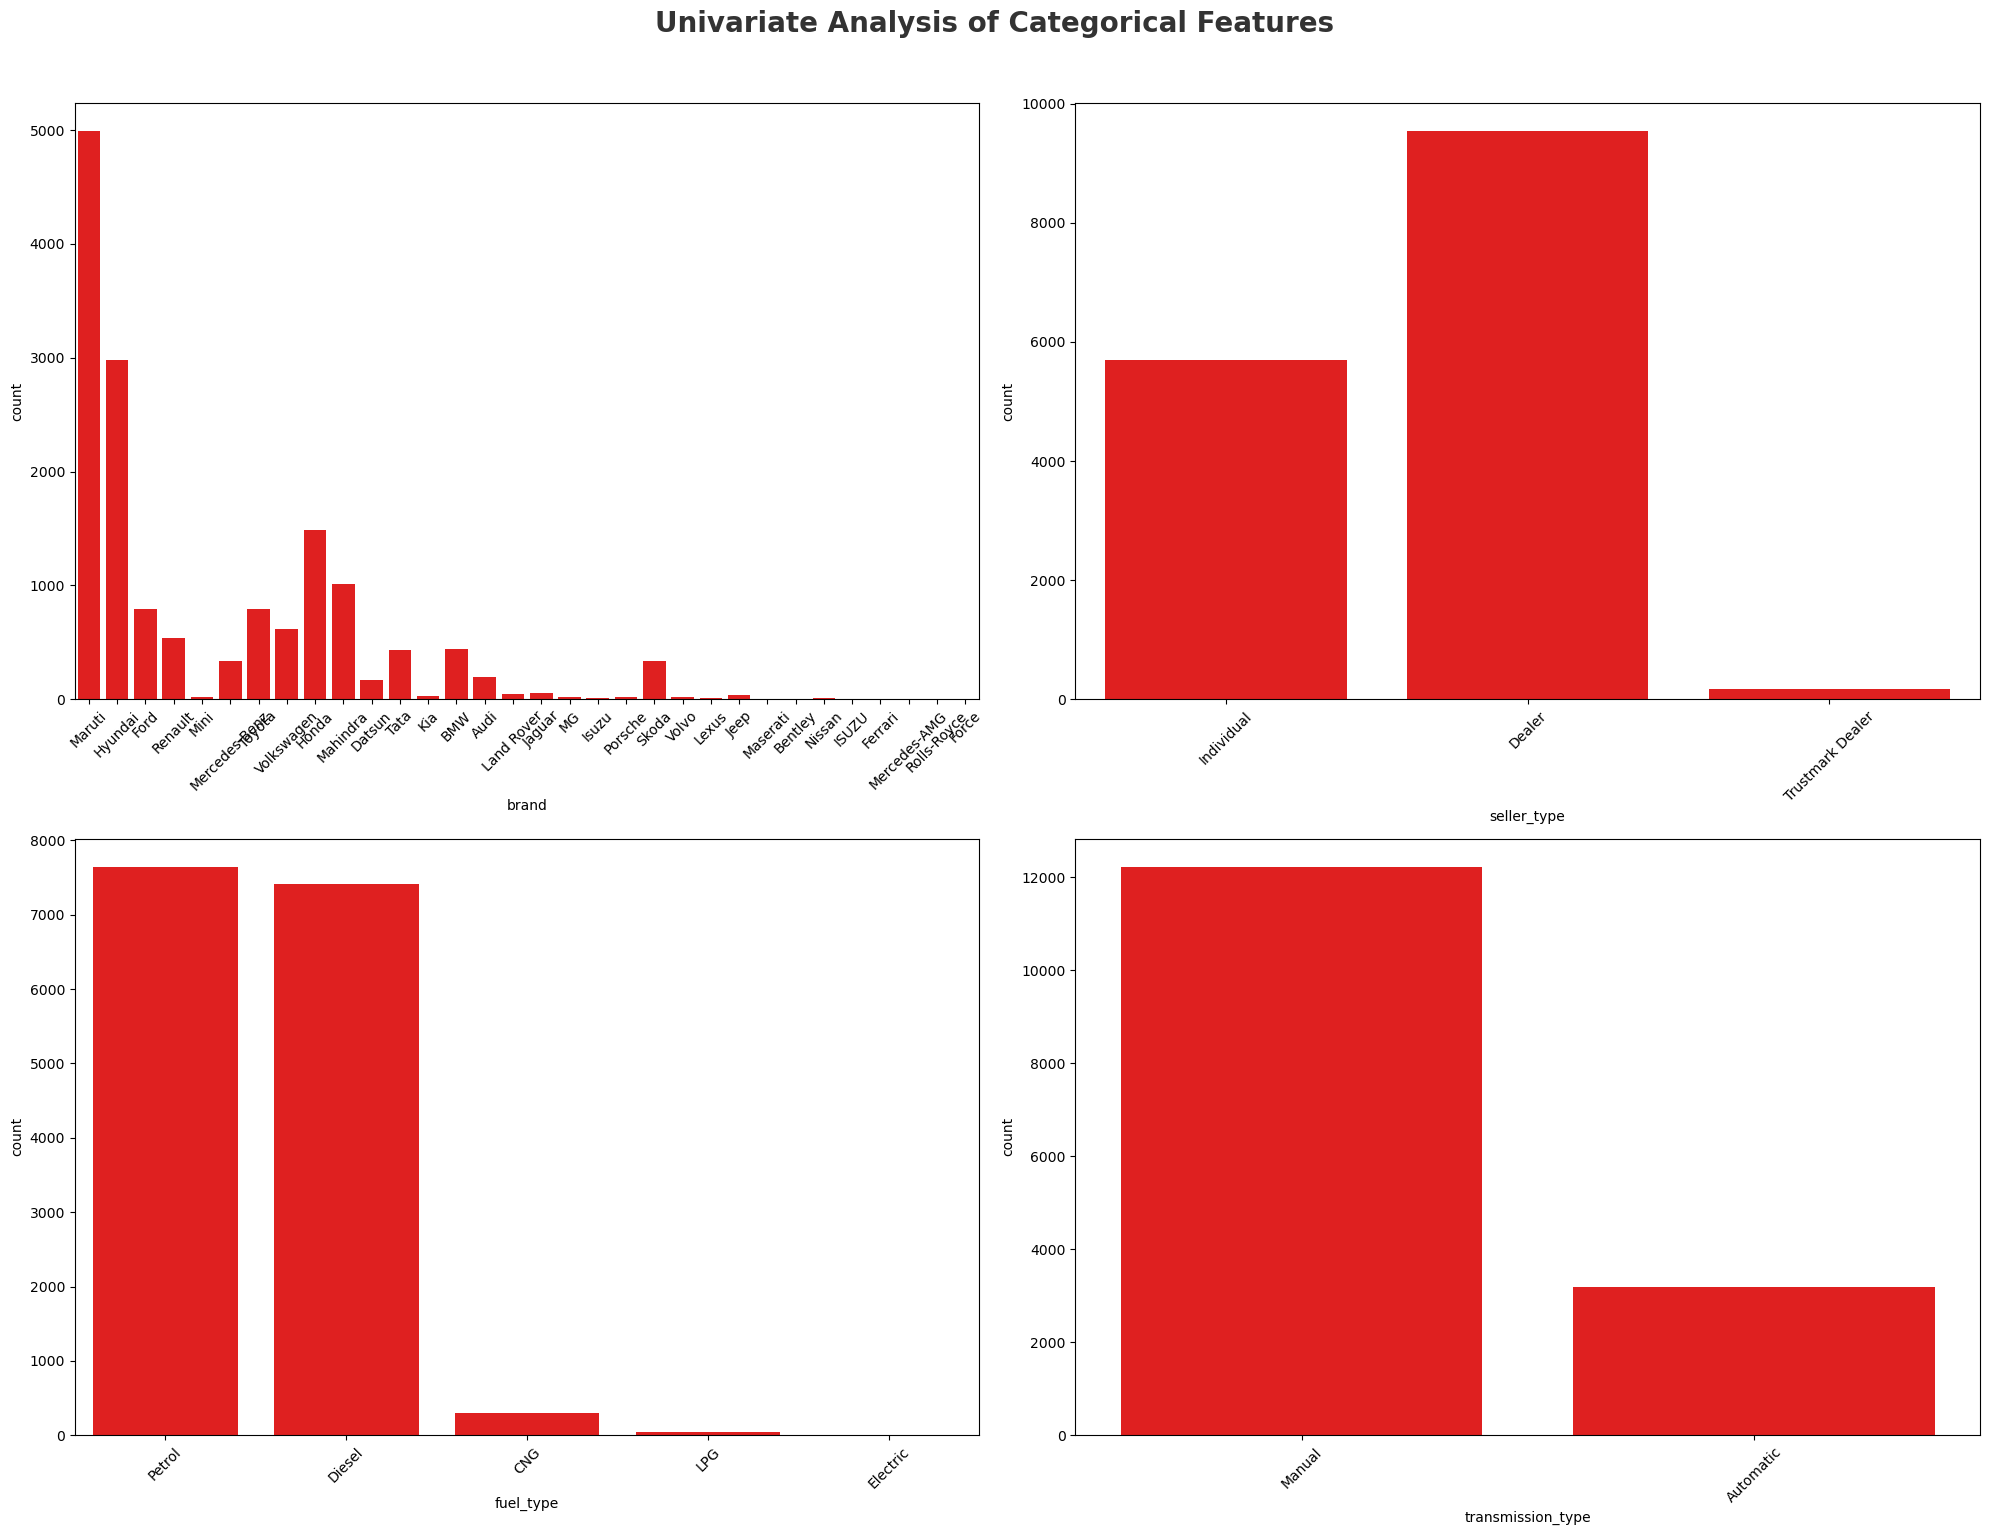

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'df' with the categorical columns



plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]],color='r')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Multivariate Analysis**
* Multivariate analysis is the analysis of more than one variable

**Check multicollinearity in Numerical features**

In [18]:
#df[(list(df.columns)[1:])].corr()

In [19]:
numeric_columns = df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
correlation_matrix


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


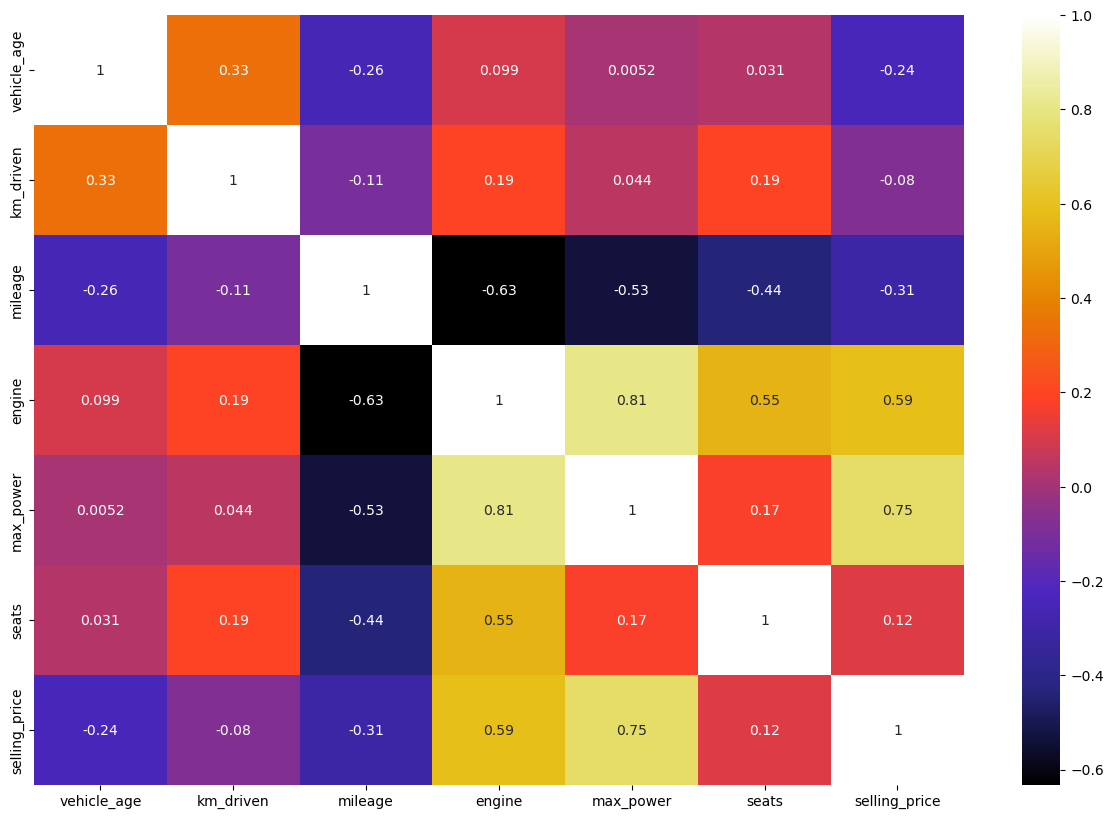

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_columns.corr(),cmap="CMRmap",annot=True)
plt.show()

# **Feature Engineering**

**1. Checking Null Values**

In [21]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [22]:
# Remove Unnecessary Columns
df.drop('car_name',axis=1,inplace=True)
df.drop('brand',axis=1,inplace=True)

In [23]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [24]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [25]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 7
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 5


In [26]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [28]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


# **Feature Encoding and Scaling**

**One Hot Encoding for Columns which had lesser unique values and not ordinal**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [30]:
len(df['model'].unique())

120

In [31]:
df['model'].value_counts()

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])

In [33]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [34]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [35]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [36]:
X = preprocessor.fit_transform(X)

In [37]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


In [38]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

# **Model Training And Model Selection**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [41]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


Lasso
Model performance for Training set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


Ridge
Model performance for Training set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 325873.0088
- Mean 

In [42]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [43]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   
                   ]

In [44]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [45]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 126015.3476
- Mean Absolute Error: 39149.7292
- R2 Score: 0.9804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 206570.9046
- Mean Absolute Error: 97687.0104
- R2 Score: 0.9433


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 363460.7706
- Mean Absolute Error: 103472.0474
- R2 Score: 0.8371
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 263888.0623
- Mean Absolute Error: 117496.2131
- R2 Score: 0.9075




In [46]:
print("The End")

The End
